# LTKHDL - Final Project

(Cập nhật lần cuối: 10/1/2022)
<h3> Thành viên nhóm: </h3>
 - Nguyễn Tuấn Anh - 18120110 <br>
 - Chương Việt Hoàng - 18120124 <br>
 - Lê Thị Tuyết Trinh - 18120616 <br>


---

## Môi trường code

In [ ]:
import sys
sys.executable

Nếu không có vấn đề gì thì file chạy python sẽ là file của môi trường code "min_ds-env".

---

## Cài đặt các thư viện cần thiết

In [1]:
%%capture
!pip install underthesea
!pip install tqdm
!pip install wordcloud

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
# YOUR CODE HERE (OPTION)
from underthesea import word_tokenize
import unidecode
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import copy

---

## Thu thập dữ liệu

Trong đồ án này, nhóm em sửa dụng dữ liệu đã được thu thập sẵn là file "review_mbbank.csv" đính kèm; đây là dữ liệu về đánh giá của người dùng về app MB Bank. Dữ liệu này được crawl từ Google Play và gốc của dữ liệu là [ở đây]().

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [3]:
df_review = pd.read_csv('review_mbbank.csv')
df_review

,ID,reviewer,content,date_time,rate
0,0,Lew Lew,"MB cái gì cũng được, trừ cái otp ngu ngốc, mỗi...",18-07-21 18:34,3
1,1,Đạt Nguyễn Js,Giới thiệu rồi có thông báo rồi mà ko nhận đc ...,14-07-21 18:08,1
2,2,ha duc,App đòi quản lý nhiều quá,13-07-21 8:49,1
3,3,Thịnh Hà,Chẳng nhận được 30k và 1k điểm khi được giới t...,11-11-21 18:56,4
4,4,Deee Yuuu,tốt,22-06-21 18:31,5
...,...,...,...,...,...
13894,13894,yen ho,Ứng dụng dì mà được thưởng mà ko nhận được,19-03-21 22:28,2
13895,13895,Nhân Nguyễn Thành Nhân,Tốt cho 5 sao luôn,10-03-21 15:35,5
13896,13896,Chieu Thien,Rất tốt. Riêng e cảm nhận thì chuyển tiền hay ...,23-09-21 9:49,5
13897,13897,Tuấn Lê,Cập nhật xong thì k vào đc ứng dụng nữa. Ứng d...,27-07-21 23:05,1


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột (không được code cứng con số) và lần lượt lưu vào 2 biến là `num_rows` và `num_cols`. 

In [4]:
# YOUR CODE HERE
num_rows, num_cols = df_review.shape

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Đây là dữ liệu được crawl từ bên Google Play về với nội dung là review của khách hàng nên nhóm em nghĩ sẽ có nhiều vấn đề ví dụ như bị trùng lặp dữ liệu, kiểu dữ liệu,...

### Dữ liệu có các dòng bị lặp không?

Bạn sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược. Gợi ý: dataframe có phương thức `duplicated`.

In [5]:
# YOUR CODE HERE
#TODO: Check have_duplicated_rows
have_duplicated_rows = df_review.duplicated().any()
print(have_duplicated_rows)

False


### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dữ liệu:
- **ID**: a unique identifier for each observation.
- **reviewer**: the account's name.
- **content**: the content of reviewer.
- **date_time**: date the reviewer take review.
- **rate**: rating of reviewer for app.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Nhóm em lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `df_review` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 

In [6]:
# YOUR CODE HERE
col_dtypes = df_review.dtypes
print(col_dtypes)

ID            int64
reviewer     object
content      object
date_time    object
rate          int64
dtype: object


**Cột có dtype là object nghĩa là sao?**

`df_review` có 3 cột có `dtype` là `object`: reviewer, content, date_time
Chúng em viết hàm nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này. (Sử dụng series.apply())

In [7]:
def open_object_dtype(s):
    dtypes = set()
    # YOUR CODE HERE
    col = pd.Series(s)
    result = col.apply(lambda x: type(x))
    dtypes = set(result)
    return dtypes
print(open_object_dtype(df_review['reviewer']))
print(open_object_dtype(df_review['content']))
print(open_object_dtype(df_review['date_time']))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


**Vấn đề cần tiền xử lý:**

- Cột "date_time" đang có dtype là `str`. Để có thể tiếp tục khám phá thêm về cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Cột "content" đang có dtype là `str`, cần kiểm tra xem có dòng content nào là chuỗi rỗng không (vì đánh giá trên google play người dùng có thể nhập chuỗi gồm các khoảng trắng và submit được).
- Cột "reviewer" đang có dtype là `str`, có lẽ cột này không có giá trị rỗng nào

---

## Tiền xử lý

### Chuyển dtype của cột "date_time" sang datetime (0.5đ)

Nhóm em chuyển `dtype` của cột "date_time" sang kiểu dữ liệu thời gian (sau khi làm xong thì cột "date_time" trong `df_review` phải thay đổi `dtype`). Nhóm em dùng câu lệnh `pd.to_datetime`; khi dùng `pd.to_datetime`, bạn truyền giá trị phù hợp cho tham số `format` (nếu không thì sẽ chạy rất chậm vì Pandas phải đoán format).

In [8]:
# YOUR CODE HERE
df_review['date_time'] = pd.to_datetime(df_review['date_time'], format="%d-%m-%y %H:%M")
# Nếu dtype của cột "Date" đã được chuyển sang datetime thì phải dùng được .dt.
assert df_review['date_time'].dt.year.min() == 2021 

### Chuyển các giá trị chuỗi trống (chỉ chứa khoảng trắng) sang NaN

Nhóm em sẽ chuyển các giá trị trống (nếu có) của cột "content" sang NaN, vì thực tế người dùng khi đánh giá app có thể nhập chuỗi trống vào và submit được.

In [9]:
# YOUR CODE HERE (x.isspace() or not x)
#replace all string " " in column District and CommunityArea
df_review['content'] = df_review['content'].replace(r'^\s+$', np.nan, regex=True)
print(df_review['content'].isna().sum())


0


Có thể thấy, không có dòng nào trong content là rỗng, bây giờ chúng em sẽ thực hiên khám phá dữ liệu và trả lời câu hỏi có ý nghĩa.

### Phân tích năm 

In [10]:
# YOUR CODE HERE
col_year = df_review['date_time'].dt.year
col_year = set(col_year)
print(col_year)

{2021}


Em lấy các năm trong thời gian review thì thấy các review này đều được lấy trong năm 2021 vậy nên tạm thời về năm không có nhiều thứ cần khai thác, nên nhóm em sẽ lấy ra các tháng để phân tích sâu hơn.

### Thêm cột "Month" vào dataframe (0.5đ)

In [11]:
# YOUR CODE HERE
df_review['Month'] = df_review['date_time'].dt.month
df_review.head()

,ID,reviewer,content,date_time,rate,Month
0,0,Lew Lew,"MB cái gì cũng được, trừ cái otp ngu ngốc, mỗi...",2021-07-18 18:34:00,3,7
1,1,Đạt Nguyễn Js,Giới thiệu rồi có thông báo rồi mà ko nhận đc ...,2021-07-14 18:08:00,1,7
2,2,ha duc,App đòi quản lý nhiều quá,2021-07-13 08:49:00,1,7
3,3,Thịnh Hà,Chẳng nhận được 30k và 1k điểm khi được giới t...,2021-11-11 18:56:00,4,11
4,4,Deee Yuuu,tốt,2021-06-22 18:31:00,5,6


### Tự thêm các điều cần xử lý ở đây

Lý giải các điều cần xử lý

---

## Khám phá dữ liệu 

### Trong cột rate, số lượng mỗi điểm là bao nhiêu?

Cột rate chứa điểm số mà người dùng đánh giá cho app, viết hàm để tính số lượng từng điểm (1 - 5) và vẽ biểu đồ

1    6699
2     736
3     686
4     647
5    5131
Name: rate, dtype: int64


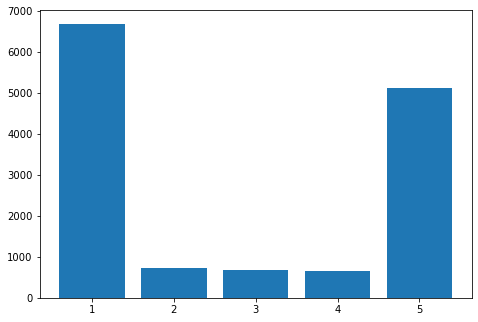

In [12]:
# YOUR CODE HERE
#Hàm để tính min, max, missing_ratio của dfcol được truyền vào
rate_count = df_review['rate'].value_counts()
rate_count = rate_count.sort_index()
print(rate_count)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(rate_count.index,rate_count)
plt.show()

Nhìn biểu đồ có thể thấy số lượt rate 1 sao và 5 sao cho app là chiếm đa số, trong đó app bị rate 1 sao nhiều nhất (6699 người đánh giá 1 sao).

### Tự thêm các điều cần khai thác ở đây

Lý giải các điều cần khai thác

In [13]:
# YOUR CODE HERE


---

## Đưa ra các câu hỏi cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
1. Người ta đánh giá như thế nào về một số tính năng của MB Bank ?<br/>
Khi app MB Bank ra một tính năng gì đó chắc chắn sẽ muốn biết nhận xét tổng của khách hàng về tính năng của mình được đánh giá tốt/xấu như thế nào, từ đó sẽ cải thiện tính năng của mình cho thích hợp hơn. Việc tìm ra đánh giá của khách hàng về một số tính năng sẽ giúp cho bên MB Bank nhận ra được các lỗi cần phải sửa và nguyên nhân vì sao app của mình lại bị nhiều rate 1 sao như hiện tại.




---

## Tiền xử lý

### Tự thêm các điều cần tiền xử lý

Lý giải điều cần tiền xử lý

In [14]:
# YOUR CODE HERE


---

## Phân tích dữ liệu để trả lời cho các câu hỏi 

### Title -- câu hỏi của Nguyễn Tuấn Anh

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Bước 1: ...
- Bước 2: ...

Code bước 1. 

In [15]:
# YOUR CODE HERE


Code bước 2. 

In [16]:
# YOUR CODE HERE


Nhận xét: ...

### Title -- câu hỏi của Chương Việt Hoàng

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Bước 1: ...
- Bước 2: ...

Code bước 1. 

In [17]:
# YOUR CODE HERE


Nhận xét: 

Code bước 2.

In [18]:
# YOUR CODE HERE

### Tìm hiểu đánh giá của người dùng về một số tính năng ? -- câu hỏi của Lê Thị Tuyết Trinh

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Bước 1: Chuyển hết các content sang dạng chữ thường (lower)
- Bước 2: Liệt kê danh sách các cách viết tên tính năng mà người dùng có thể viết review (ví dụ tính năng 'đăng ký' có thể được người dùng viết là 'đăng kí', 'đk', 'dk',...)
- Bước 3: Lọc ra các content có chứa từ khóa (tên tính năng) tìm thấy ở bước 1
- Bước 4: Thực hiện đếm số lượng theo rating và vẽ biểu đồ

Code bước 1. 

In [19]:
# YOUR CODE HERE
#Chuyển hết content sang dạng chữ thường
df_clone = copy.deepcopy(df_review)
df_clone['content'] = df_clone['content'].str.lower()

Code bước 2. 

In [21]:
# YOUR CODE HERE
list_char = ['i','ì','í','ị','ỉ','y','ỳ','ý','ỵ','ỷ']
#Liệt kê danh sách các cách viết tên tính năng
def generateFeatureName(name):
    list_name = [name];
    list_name.append(unidecode.unidecode(name))
    list_split = name.split();
    last_char = name[len(name)-1]
    if(len(list_split) > 1):
        first_char = list_split[0][0]
        list_name.append(first_char+list_split[1])
        list_name.append(first_char+unidecode.unidecode(list_split[1]))
        list_name.append(unidecode.unidecode(first_char)+unidecode.unidecode(list_split[1]))
        list_name.append(first_char+list_split[1][0])
        list_name.append(first_char+unidecode.unidecode(list_split[1][0]))
        list_name.append(unidecode.unidecode(first_char)+unidecode.unidecode(list_split[1][0]))
        list_name.append(unidecode.unidecode(first_char)+list_split[1][0])
    if(unidecode.unidecode(last_char) == 'i' or unidecode.unidecode(last_char) == 'i'):
        index_ofi = list_char.index(name[len(name)-1]);
        if(list_char.index(name[len(name)-1])<5):
            namei = copy.deepcopy(name);
            name_new = namei[0:(len(namei) - 1)] + list_char[index_ofi+5]
            list_name.append(name_new)
            list_name.append(unidecode.unidecode(name_new))
            list_split = name_new.split();
            last_char = name_new[len(name_new)-1]
            if(len(list_split) > 1):
                first_char = list_split[0][0]
                list_name.append(first_char+list_split[1])
                list_name.append(first_char+unidecode.unidecode(list_split[1]))
                list_name.append(unidecode.unidecode(first_char)+unidecode.unidecode(list_split[1]))
        if(list_char.index(name[len(name)-1])>=5):
            namei = copy.deepcopy(name);
            name_new = namei[0:(len(namei) - 1)] + list_char[index_ofi-5]
            list_name.append(name_new)
            list_name.append(unidecode.unidecode(name_new))
            list_split = name_new.split();
            last_char = name_new[len(name_new)-1]
            if(len(list_split) > 1):
                first_char = list_split[0][0]
                list_name.append(first_char+list_split[1])
                list_name.append(first_char+unidecode.unidecode(list_split[1]))
                list_name.append(unidecode.unidecode(first_char)+unidecode.unidecode(list_split[1]))
    return set(list_name)

list_otp = generateFeatureName('otp')
list_dk = generateFeatureName('đăng kí')
list_gt = generateFeatureName('giới thiệu')
list_cn = generateFeatureName('cập nhật')
list_dn = generateFeatureName('đăng nhập')
list_ct = generateFeatureName('chuyển tiền')

Code bước 3. 

In [22]:
#Lọc các content chứa từ khóa
def filterConstrainKeyword(list_keyword):
    df_result = pd.DataFrame()
    for keyword in list_keyword:
        df_filter = df_clone[df_clone['content'].str.contains(keyword, regex=False)]
        df_result = df_result.append(df_filter)
    df_result = df_result.drop_duplicates()
    return df_result

df_filter_dk = filterConstrainKeyword(list_dk)
df_filter_dn = filterConstrainKeyword(list_dn)
df_filter_gt = filterConstrainKeyword(list_gt)
df_filter_otp = filterConstrainKeyword(list_otp)
df_filter_cn = filterConstrainKeyword(list_cn)
df_filter_ct = filterConstrainKeyword(list_ct)

Code bước 4 : Vẽ biểu đồ theo rate 

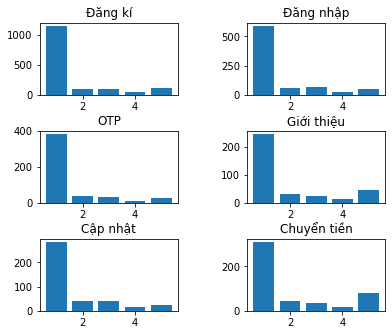

In [23]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2)

rate_count = df_filter_dk['rate'].value_counts()
rate_count = rate_count.sort_index()
ax1.bar(rate_count.index,rate_count)
ax1.set_title('Đăng kí')

rate_count = df_filter_dn['rate'].value_counts()
rate_count = rate_count.sort_index()
ax2.bar(rate_count.index,rate_count)
ax2.set_title('Đăng nhập')

rate_count = df_filter_otp['rate'].value_counts()
rate_count = rate_count.sort_index()
ax3.bar(rate_count.index,rate_count)
ax3.set_title('OTP')

rate_count = df_filter_gt['rate'].value_counts()
rate_count = rate_count.sort_index()
ax4.bar(rate_count.index,rate_count)
ax4.set_title('Giới thiệu')

rate_count = df_filter_cn['rate'].value_counts()
rate_count = rate_count.sort_index()
ax5.bar(rate_count.index,rate_count)
ax5.set_title('Cập nhật')

rate_count = df_filter_ct['rate'].value_counts()
rate_count = rate_count.sort_index()
ax6.bar(rate_count.index,rate_count)
ax6.set_title('Chuyển tiền')
#Set Spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.1, 
                    wspace=0.5, 
                    hspace=0.5)
plt.show()

**Nhận xét**: Em thực hiện khảo sát đánh giá của các bình luận có nhắc đến "đăng ký", "otp", "giới thiệu", "cập nhật" và nhận thấy các bình luận này đa số là đánh giá 1 sao.
- **Đăng kí**: đây là tính năng quan trọng nhất của mọi app vì tính năng này sẽ là tính năng đầu tiên mà người dùng mới tiếp cận vào 1 app, có ảnh hưởng cao đến việc user có tiếp tục với app của mình không, vậy nên với 1000 bài review nhắc về đăng kí là phàn nàn (đánh giá 1 sao) thì em nghĩ MB Bank cần xem xét về tính năng này của họ để cải thiện cảm nhận của người dùng về app của mình
- **Đăng nhập**: có khoảng hơn 500 bài review nhắc về đăng nhập đánh giá 1 sao thì em nghĩ MB Bank cần kiểm thử lại tính năng đăng nhập của app
- **OTP**: là một bước để người dùng xác thực khi đăng kí, với khoảng gần 400 lượt rate 1 sao (chiếm khoảng hơn 80%) có nhắc tới OTP, em nghĩ đây là 1 phần nguyên nhân mà người dùng rate 1 sao nhiều ở tính năng đăng kí bên trên, MB Bank có thể suy nghĩ về việc cải thiện tính năng đăng kí với việc xem xét lại OTP
- **Giới thiệu**: là tính năng mới của MB Bank tạo ra để mở rộng độ phổ biến của app, khi 1 người dùng giới thiệu thành công cho người khác sẽ được tặng tiền vào tài khoản. Vậy nhưng có khoảng 300 review nhắc tới "giới thiệu" với hơn 200 review đánh 1 sao, phải chăng người dùng đã giới thiệu cho bạn bè nhưng không được cộng tiền? Đây cũng là 1 bug mà MB Bank cần xem xét và fix bug để người dùng có thêm động lực giới thiệu nhiều bạn bè khác :D, bên cạnh đó cũng có 1 lượng người đánh giá 5 sao cho tính năng này (tỉ lệ cao hơn các tính năng đăng kí, OTP), cho thấy tính năng mới này được hưởng ứng, nên MB Bank cần xem xét fix bug được kể trên
- **Cập nhật**: Các app đều có các đợt cập nhật để thêm tính năng mới hoặc fix bug, nhưng khoảng hơn 250 lượt đánh giá 1 sao có nhắc tới cập nhật, có lẽ sau mỗi đợt cập nhật app có 1 số bug khiến người dùng khó chịu mà MB Bank cần đọc các review này để xem lỗi nào để các lần cập nhật sau không bị lại
- **Chuyển tiền**: Vì đây là 1 app của ngân hàng nên vấn đề chuyển tiền là rất quan trọng, cần giảm số lượng bug liên quan đến chuyển tiền đến mức thấp nhất có thể, nhưng ở đây em đang thấy với khoảng 300 lượt vote 1 sao có nhắc đến chuyển tiền... hmm có vẻ nhóm IT cần cải thiện tính năng này càng sớm càng tốt